<a href="https://colab.research.google.com/github/santolina/pytorch_handbook/blob/master/PyTorchHandbook_chap2_example_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# isntall torch
!pip install torch
!pip install torchvision

In [0]:
import torch
import numpy as np

In [67]:
torch.__version__

'1.3.1'

# Section 2.3 Network Definition


In [44]:
#1 network define using sequential manner

import torch.nn as nn

model = nn.Sequential(
    nn.Conv2d(1, 20, 5),
    nn.ReLU(),
    nn.Conv2d(20, 60, 5),
    nn.ReLU()
)

model

Sequential(
  (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(20, 60, kernel_size=(5, 5), stride=(1, 1))
  (3): ReLU()
)

In [45]:
#2 network define using add module
model = torch.nn.Sequential()

model.add_module('conv1', nn.Conv2d(1,20,5))
model.add_module('relu1', nn.ReLU())
model.add_module('conv2', nn.Conv2d(20,64,5))
model.add_module('relu2', nn.ReLU())

model

Sequential(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
)

In [46]:
#3 network define using OrderedDict
from collections import OrderedDict

layersDict = OrderedDict([
                          ('conv1', nn.Conv2d(1, 20, 5)),
                          ('relu1', nn.ReLU()),
                          ('conv2', nn.Conv2d(20, 60, 5)),
                          ('relu2', nn.ReLU())])

model = nn.Sequential(layersDict)
model


Sequential(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(20, 60, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
)

In [47]:
layers = OrderedDict()
layers['conv1'] = nn.Conv2d(1, 20, 5)
layers['relu1'] = nn.ReLU()
layers['conv2'] = nn.Conv2d(20, 60, 5)
layers['relu2'] = nn.ReLU()

model = nn.Sequential(layers)
model

Sequential(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(20, 60, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
)

In [48]:
# network define using functional API
# using nn.Module

import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.conv1 = nn.Conv2d(1, 20, 5)
    self.conv2 = nn.Conv2d(20, 64, 5)

  def foward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    return x

model = Model()  
model

Model(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
)

In [49]:
# network define using functional API
# using nn.Module

import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.conv1 = nn.Conv2d(1, 20, 5)
    self.conv2 = nn.Conv2d(20, 64, 5)
    self.relu1 = nn.ReLU()
    self.relu2 = nn.ReLU()

  def foward(self, x):
    x = self.relu1(self.conv1(x))
    x = self.relu2(self.conv2(x))
    return x

model = Model()  
model

Model(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (relu2): ReLU()
)

In [50]:
# network define using functional API and nn.ModuleList

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.convs = nn.ModuleList(
        [
         nn.Conv2d(1 ,20, 5),
         nn.Conv2d(20, 64, 5)         
        ])

  def forward(self, x):
    for i, l in enumerate(self.convs):
      x = F.relu(l(x))
    return x

model = Model()
model

Model(
  (convs): ModuleList(
    (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  )
)

In [51]:
# network define using functional API and nn.ModuleList

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.convs = nn.ModuleList(
        [
         nn.Conv2d(1 ,20, 5),
         nn.ReLU(),
         nn.Conv2d(20, 64, 5),
         nn.ReLU()
        ])

  def forward(self, x):
    for i, l in enumerate(self.convs):
      x = l(x)
    return x

model = Model()
model

Model(
  (convs): ModuleList(
    (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU()
  )
)

In [52]:
# network define using functional API and nn.ModuleDict

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.convs = nn.ModuleDict(
        {
          'conv1': nn.Conv2d(1, 20, 5),
          'relu1': nn.ReLU(),
          'conv2': nn.Conv2d(20, 64, 5),
          'relu2': nn.ReLU()
        }
    )

  def forward(self, x):
    for l in self.convs.values():
      x = l(x)
    return x

model = Model()
model

Model(
  (convs): ModuleDict(
    (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
    (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
    (relu1): ReLU()
    (relu2): ReLU()
  )
)

# AutoGrad

In [53]:
# define tensor
x = torch.tensor(1, requires_grad=True, dtype=torch.float32)
w = torch.tensor(2, requires_grad=True, dtype=torch.float32)
b = torch.tensor(3, requires_grad=True, dtype=torch.float32)

# define graph

y = w * x + b

print(y)


tensor(5., grad_fn=<AddBackward0>)


In [54]:
# check gradient
print(y.backward())

None


In [55]:
print(x.grad)
print(w.grad)
print(b.grad)

tensor(2.)
tensor(1.)
tensor(1.)


In [56]:
# Freeze parameter

import torchvision

net = torchvision.models.vgg16(pretrained=True)
for param in net.features.parameters():
  param.requires_grad = False

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 239MB/s]


In [57]:
net

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# Enable GPU

In [0]:
# Enable GPU

xf_gpu = torch.FloatTensor(1, 2).to('cuda')

In [59]:
xf_gpu

tensor([[5.0991e-36, 0.0000e+00]], device='cuda:0')

In [60]:

import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.conv1 = nn.Conv2d(1, 20, 5)
    self.relu1 = nn.ReLU()
    self.conv2 = nn.Conv2d(20, 64, 5)
    self.relu2 = nn.ReLU()

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    return x

net = Model()
net.to('cuda')

Model(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
)

# Loss Function and Optimization


In [68]:
# MSELoss
x = torch.randn(8)
y = torch.randn(8)

criterion = nn.MSELoss()
loss = criterion(x,y)
print(loss)

tensor(2.0397)


In [69]:
# CrossEntropyLoss
x = torch.randn(1, 8)
y = torch.LongTensor([1]).random_(8)

criterion = nn.CrossEntropyLoss()
loss = criterion(x, y)

print(loss)

tensor(1.2366)


In [70]:
# linear layer for optimization
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    # nn. Linear
    self.lin1 = nn.Linear(in_features=10, out_features=10, bias=False)

  def forward(self, x):
    x = self.lin1(x)
    return x

net = Net()
net
  

Net(
  (lin1): Linear(in_features=10, out_features=10, bias=False)
)

In [0]:
def solver(opt_conf='sgd', num_epoch=100):
  loss_list = [ ]

  # generate data
  x = torch.randn(1, 10)
  w = torch.randn(1, 1)
  y = torch.mul(w, x) + 2

  # network define
  net = Net()

  # define loss function
  criterion = nn.MSELoss()

  # Optimization method
  if opt_conf == 'sgd':
    optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
  elif opt_conf == 'momentum_sgd':
    optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
  elif opt_conf == 'adadelta':
    optimizer = torch.optim.Adadelta(net.parameters(), rho=0.95, eps=1e-04)
  elif opt_conf == 'adagrad':
    optimizer = torch.optim.Adagrad(net.parameters())
  elif opt_conf == 'adam':
    optimizer = torch.optim.Adam(net.parameters(), lr=1e-1, betas=(0.9, 0.99), eps=1e-09)
  elif opt_conf == 'rmsprop':
    optimizer = torch.optim.RMSprop(net.parameters())
  else:
    print('invalid parameter')
    raise

  # train
  for epoch in range(num_epoch):
    optimizer.zero_grad()

    y_pred = net(x)

    loss = criterion(y_pred, y)
    loss.backward()

    optimizer.step()

    loss_list.append(loss.data.item())

  return loss_list





In [0]:
# compare optimizer
loss_dict = {}
loss_dict['sgd'] = []
loss_dict['momentum_sgd'] = []
loss_dict['adadelta'] = []
loss_dict['adam'] = []
loss_dict['rmsprop'] = []

for key, value in loss_dict.items():
  loss_dict[key] = solver(opt_conf=key)


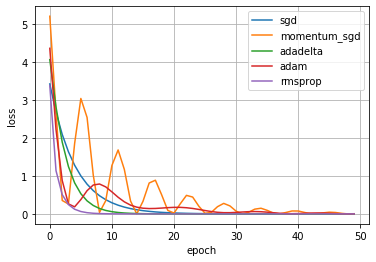

In [84]:
import matplotlib.pyplot as plt

plt.figure()
for key in loss_dict.keys():
  plt.plot(loss_dict[key][:50], label=key)

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
